## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

<ipython-input-1-61a122aff8f6>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection



In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
# general information about the dataset such as type and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
# descriptive statistics about the dataset such as the mean and standard deviation
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [ ]:
# includes categorical values in the statistics of the dataset
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#if we want to inspect the data of the 15 newest car models
df.sort_values('year', ascending=False).head(15)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
1236,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0h99fr139230,fl,4.4,556.0mi,—,tan,ford motor credit company,$18150,$19600,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
17873,2015,Jeep,Grand Cherokee,Limited,suv,automatic,1c4rjfbg8fc674941,pa,5.0,15041.0mi,black,black,enterprise veh exchange/rental,$34300,$34800,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT)
31573,2015,Ford,Explorer,Limited,SUV,automatic,1fm5k8f82fga77914,nj,4.3,8923.0mi,blue,black,enterprise veh exchange/rental,$33400,$30500,Wed Feb 18 2015 01:30:00 GMT-0800 (PST)
1909,2015,BMW,5 Series Gran Turismo,535i,hatchback,automatic,wba5m2c54fd872063,ca,4.7,6436.0mi,gray,black,financial services remarketing (lease),$48100,$53500,Thu Jun 04 2015 05:30:00 GMT-0700 (PDT)
17861,2015,Mazda,Mazda6,i Sport,Sedan,automatic,jm1gj1u54f1180111,fl,4.3,13185.0mi,black,black,enterprise veh exchange/rental,$17800,$18200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
20306,2015,Chevrolet,Tahoe,LTZ,SUV,automatic,1gnskckc1fr539007,mo,4.2,21866.0mi,black,black,budget rent a car/kansas city funding llc,$53900,$50500,Tue May 26 2015 04:00:00 GMT-0700 (PDT)
15878,2015,Chevrolet,Tahoe,LTZ,SUV,automatic,1gnscckc5fr197719,fl,1.0,1.0mi,black,black,enterprise veh exchange/rental,$16500,$4100,Tue Jun 23 2015 02:30:00 GMT-0700 (PDT)
28765,2015,Kia,Sorento,LX,suv,automatic,5xyktda74fg639200,fl,4.9,14395.0mi,burgundy,black,"kia motors america, inc",$21000,$20200,Wed Jun 17 2015 02:30:00 GMT-0700 (PDT)
39605,2015,Kia,Sorento,LX,SUV,automatic,5xyktca67fg585862,wi,4.3,11281.0mi,black,black,"kia motors america, inc",$21000,$20700,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
31593,2015,BMW,4 Series,428i,convertible,automatic,wba3v5c50fp752376,oh,5.0,7334.0mi,blue,black,bmw north america greer,$49000,$48000,Tue Jun 16 2015 07:00:00 GMT-0700 (PDT)


In [ ]:
# number/ frequency of attribute instances and its data type
df['make'].value_counts()

Ford             7871
Chevrolet        5322
Nissan           4297
Toyota           3474
Dodge            2718
Honda            2403
Hyundai          1801
BMW              1680
Kia              1639
Chrysler         1566
Infiniti         1442
Mercedes-Benz    1375
Jeep             1305
Volkswagen       1038
Lexus            1024
GMC               901
Mazda             701
Cadillac          606
Audi              485
Acura             476
Buick             467
Lincoln           457
Subaru            444
Ram               397
Pontiac           377
Mitsubishi        370
MINI              289
Saturn            286
Volvo             281
Scion             159
Mercury           148
Land Rover        143
Porsche           129
Jaguar            122
Suzuki             96
HUMMER             84
FIAT               56
Saab               41
smart              36
Oldsmobile         24
Isuzu              19
Maserati           10
Bentley             8
Fisker              3
Plymouth            3
Geo       

In [ ]:
# shows amount of null values in the independent variables of the dataset
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
#filter for specific columns example
sorted_year= df.sort_values('year', ascending=False)
sorted_year[['seller','year']].head(10)

,seller,year
1236,ford motor credit company,2015
17873,enterprise veh exchange/rental,2015
31573,enterprise veh exchange/rental,2015
1909,financial services remarketing (lease),2015
17861,enterprise veh exchange/rental,2015
20306,budget rent a car/kansas city funding llc,2015
15878,enterprise veh exchange/rental,2015
28765,"kia motors america, inc",2015
39605,"kia motors america, inc",2015
31593,bmw north america greer,2015


In [ ]:
#If we want to filter the dataframe to just a certain model such as Sorento, we can use index with a boolean mask
df[df['model'] == 'Sorento']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
165,2015,Kia,Sorento,LX,suv,automatic,5xyktca62fg571707,wi,4.2,14700.0mi,silver,gray,"kia motors america, inc",$20000,$20200,Wed Jun 17 2015 03:30:00 GMT-0700 (PDT)
322,2015,Kia,Sorento,LX,SUV,automatic,5xyktca68fg551025,mn,5.0,21296.0mi,white,tan,"kia motors america, inc",$19750,$19700,Thu May 21 2015 03:30:00 GMT-0700 (PDT)
362,2012,Kia,Sorento,LX,SUV,automatic,5xyktda60cg219694,az,3.9,48203.0mi,gray,black,n-baro auction team wholesale motor vehicle,$14650,$16300,Thu Feb 19 2015 02:30:00 GMT-0800 (PST)
664,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg585166,wi,4.8,15310.0mi,silver,gray,"kia motors america, inc",$20800,$20800,Wed Jan 21 2015 02:00:00 GMT-0800 (PST)
957,2014,Kia,Sorento,LX,SUV,automatic,5xyktca63eg448139,tn,4.3,57587.0mi,gray,black,the hertz corporation,$15650,$15600,Wed Feb 25 2015 02:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45939,2015,Kia,Sorento,LX,SUV,automatic,5xyktca61fg571925,oh,5.0,10224.0mi,black,gray,"kia motors america, inc",$20900,$21200,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
46081,2006,Kia,Sorento,LX,SUV,automatic,kndjd733065646965,sc,3.7,100617.0mi,beige,tan,rick hendrick dodge chrysler jeep ram,$4375,$5700,Tue Jan 27 2015 02:00:00 GMT-0800 (PST)
46180,2011,Kia,Sorento,Base,SUV,automatic,5xykt3a1xbg133645,il,2.5,37042.0mi,gray,gray,par north america,$12250,$10200,Thu Mar 05 2015 02:00:00 GMT-0800 (PST)
46297,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69eg446685,tx,4.4,55201.0mi,silver,silver,the hertz corporation,$14350,$14500,Thu May 28 2015 04:00:00 GMT-0700 (PDT)


## Data Pre-Processing & Cleaning



In [2]:
# Removes the 'mi' in the odometer column and converts it to int
df['odometer'] = df['odometer'].str.extract('([1.0-9.9]+)', expand=False).str.strip()

df['odometer']=df['odometer'].astype(float)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 5.7+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [3]:
# Converting salesdate into datetime
df['saledate']=pd.to_datetime(df['saledate'])
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,$11000,$10900,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,$28700,$29900,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,$22200,$24200,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,$3675,$3200,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,$22500,$22100,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,$15650,$17000,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,$19350,$21500,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,$22200,$22000,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,$13400,$13800,2015-01-14 04:30:00+08:00


In [4]:
# Removes the '$' sign in the mmr column and converts it to float
df['mmr'] = df['mmr'].str.replace('$', '')
df['mmr']=df['mmr'].astype(float)
df

<ipython-input-4-64bec0772649>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['mmr'] = df['mmr'].str.replace('$', '')


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,$10900,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700.0,$29900,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,$24200,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,$3200,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,$22100,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,15650.0,$17000,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,$21500,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,$22000,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,$13800,2015-01-14 04:30:00+08:00


In [5]:
# Removes the '$' sign in the SellingPrice column and converts it to float
df['sellingprice'] = df['sellingprice'].str.replace('$', '')
df['sellingprice']=df['sellingprice'].astype(float)
df

<ipython-input-5-d1af467886b3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sellingprice'] = df['sellingprice'].str.replace('$', '')


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700.0,29900.0,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,15650.0,17000.0,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,21500.0,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,22000.0,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,13800.0,2015-01-14 04:30:00+08:00


In [8]:
# Capitilizing the first letter in each word in the body column
df['body'] = df['body'].str.title()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,Suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,28700.0,29900.0,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,Suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,black,gray,wheels exchange llc,15650.0,17000.0,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,21500.0,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,22000.0,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,13800.0,2015-01-14 04:30:00+08:00


In [6]:
# Removes the '—' found in the color column and replacing it with Black as it is the most frequent color
df['color'] = df['color'].str.replace('—', 'black')
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700.0,29900.0,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,black,gray,wheels exchange llc,15650.0,17000.0,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,21500.0,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,22000.0,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,13800.0,2015-01-14 04:30:00+08:00


In [7]:
# Removes the '—' found in the interior column
df['interior'] = df['interior'].str.replace('—', 'black')
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,28700.0,29900.0,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,black,gray,wheels exchange llc,15650.0,17000.0,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,21500.0,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,22000.0,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,13800.0,2015-01-14 04:30:00+08:00


In [10]:
types = ["Cab","Sedan","Convertible", "Coupe", "Hatchback","Suv","Minivan", "Wagon","Supercab","Koup","Xtracab","Van","Supercrew"]
keyword= '|'.join(r"{}".format(x) for x in types)
df['body'] = df['body'].str.extract('('+ keyword +')',expand=False)

print(keyword)

Cab|Sedan|Convertible|Coupe|Hatchback|Suv|Minivan|Wagon|Supercab|Koup|Xtracab|Van|Supercrew


In [11]:
# #Replacing the body data with correct values
df['body'] = df['body'].str.replace('Cab', 'Pickup Truck')
df['body'] = df['body'].str.replace('Supercab', 'Pickup Truck')
df['body'] = df['body'].str.replace('Xtracab', 'Pickup Truck')
df['body'] = df['body'].str.replace('Supercrew', 'Pickup Truck')
df['body'] = df['body'].str.replace('Koup', 'Coupe')
df['body'] = df['body'].str.replace('Suv', 'SUV')
df['body'] = df['body'].str.replace('Van', 'Minivan')

df['body'].unique()

array(['Sedan', nan, 'Minivan', 'Wagon', 'Coupe', 'Convertible',
       'Hatchback'], dtype=object)

## Exploratory Data Analysis


**Visualization**

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

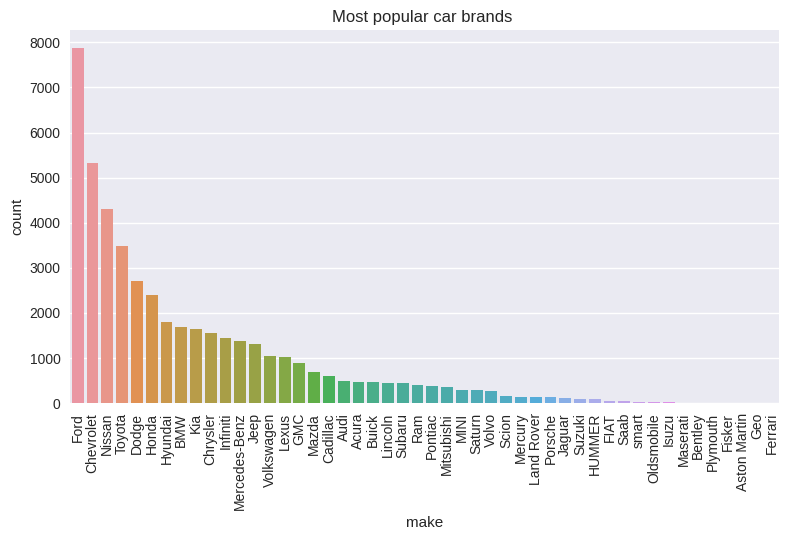

In [12]:
# plot sorted in descending order, rotated x-axis labels for clarity, and a plot title. relating car brand with selling price
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands ')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: The most popular car brand is Ford due to having the highest frequency as shown in the bar chart (having nearly 6000 as a frequency). it is followed by Chevrolet having roughly 5100 as a frequency and in third place comes Nissan having about 4000 as a frequency.


**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

<Axes: xlabel='transmission', ylabel='sellingprice'>

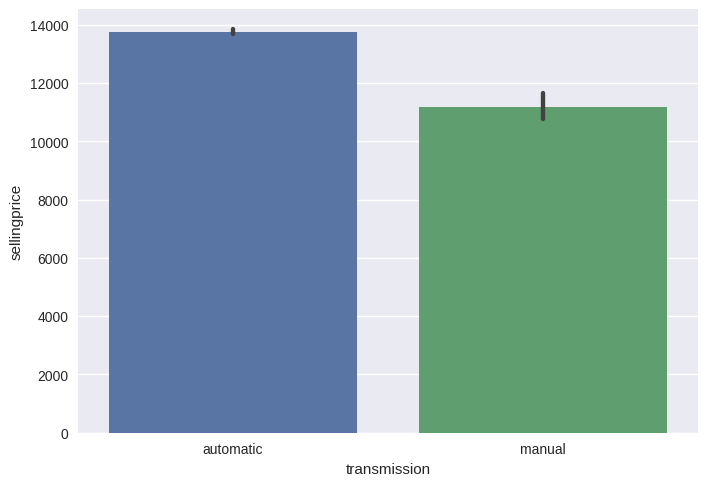

In [13]:
# bar plot that visualizes the transmission type with the average selling price
sns.barplot(data=df, x="transmission", y="sellingprice")

**Answer for Q2**: Yes, automatic car transmission type sells higher on average than the manual type as shown in the bar chart the automatic type has a selling price that is roughly 14,000 dollars while the manual type has about 11,000 dollars. On average, the automatic type is higher than the manual type by 3000 dollars

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

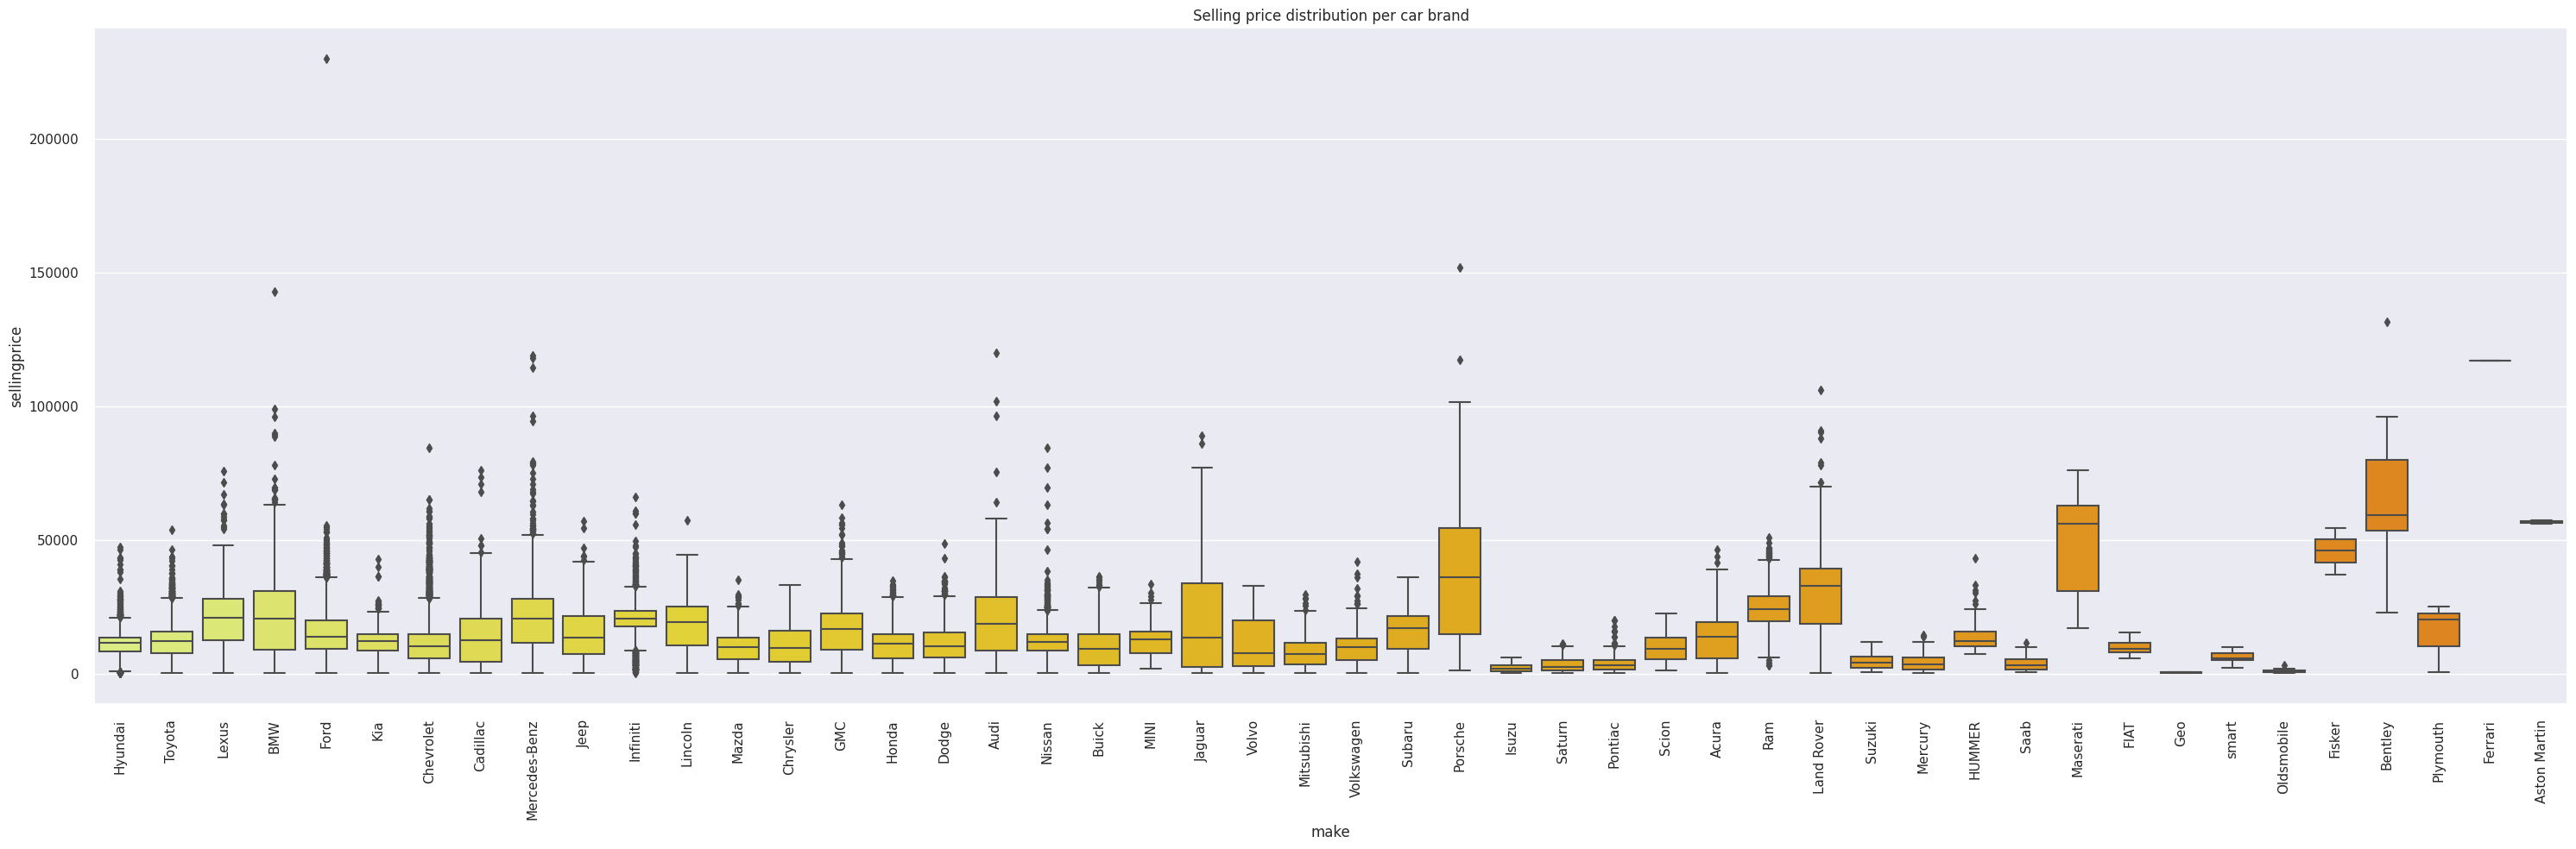

In [17]:
# box plot showing the distribution of the selling prices of each car make 
plt.figure(figsize = (30,10))
sns.set(font_scale=1)
sns.boxplot(x='make', y='sellingprice', data=df, palette='Wistia').set(title='Selling price distribution per car brand')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q3**: for the widest distribution, Porchse and jaguar.
for the most expensive, porchse and bentley.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

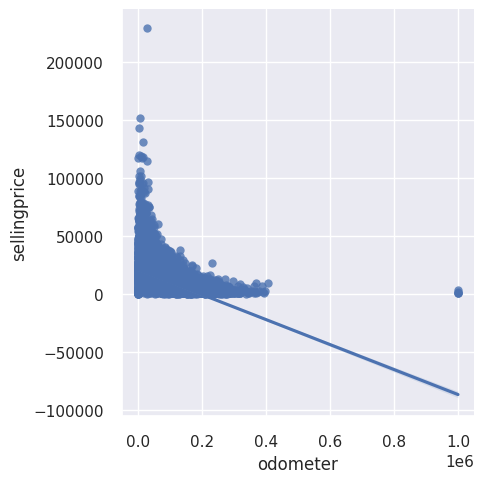

In [21]:
# Scatter plot with the best fit line
sns.lmplot(x= 'odometer', y= 'sellingprice', data = df)

In [22]:
corr = df.corr()
corr

<ipython-input-22-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,year,condition,odometer,mmr,sellingprice
year,1.000000,0.549158,-0.777219,0.592904,0.581164
condition,0.549158,1.000000,-0.540371,0.476200,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.587920,-0.580900
mmr,0.592904,0.476200,-0.587920,1.000000,0.979783
sellingprice,0.581164,0.529141,-0.580900,0.979783,1.000000


**Answer for Q4**: the odometer and the selling price have a strong negative correlation as shown in the graph

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

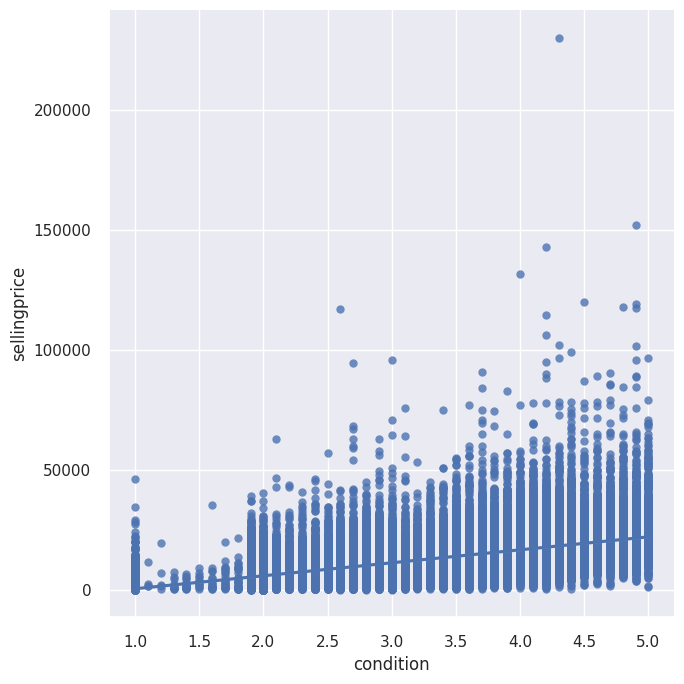

In [28]:
# Scatter plot with the bestfit line
sns.lmplot(x='condition', y='sellingprice', data=df, height = 7)

**Answer for Q5**: they have a weak positive correlation

In [29]:
corr = df.corr()
corr

<ipython-input-29-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,year,condition,odometer,mmr,sellingprice
year,1.000000,0.549158,-0.777219,0.592904,0.581164
condition,0.549158,1.000000,-0.540371,0.476200,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.587920,-0.580900
mmr,0.592904,0.476200,-0.587920,1.000000,0.979783
sellingprice,0.581164,0.529141,-0.580900,0.979783,1.000000


**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

In [32]:
#sort the values descendingly
sorted_df =df.groupby('body')['sellingprice'].mean().sort_values(ascending=False)
sorted_df

body
Convertible    17581.563278
Coupe          16538.921097
Minivan        11981.053571
Sedan          11861.795912
Hatchback      10320.636123
Wagon           9872.678720
Name: sellingprice, dtype: float64

In [33]:
new_df= sorted_df.to_frame()
new_df.reset_index(inplace=True)
new_df = new_df.rename(columns = {'index':'body'})
new_df

,body,sellingprice
0,Convertible,17581.563278
1,Coupe,16538.921097
2,Minivan,11981.053571
3,Sedan,11861.795912
4,Hatchback,10320.636123
5,Wagon,9872.678720


**Visualization**

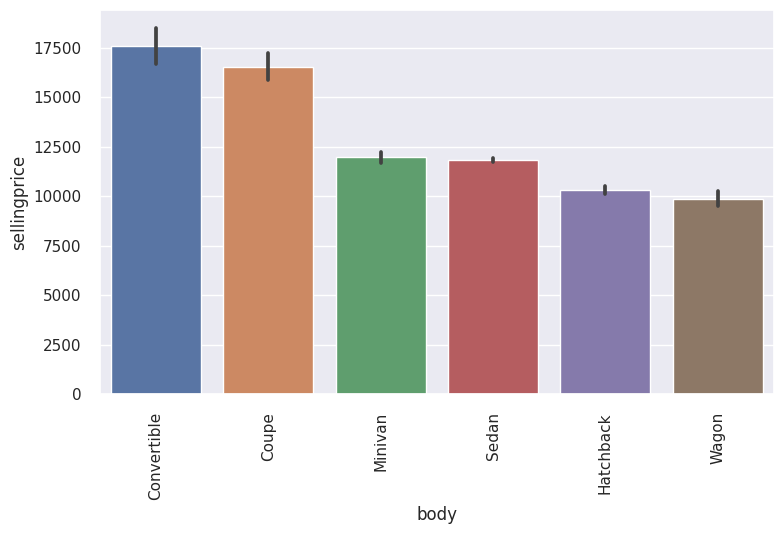

In [34]:
# bar plot sorted ascendingly to visualize the selling price according to the body type
large_to_small = df[['sellingprice','body']].groupby('body').mean().sort_values('sellingprice',ascending=False).index
sns.barplot(x='body', y='sellingprice', data=df, order=large_to_small)
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q6**: the most expensive body type is convertible as shown in the graph has a selling price of about 17500. the least expensive is the wagon type as it has a selling price of less than 10000. we believe that the average car price does not differ according to body type as the first half of body types are selling at about the same selling price above 15000 and the other half below 12500 and all of them fall in the same range and do not differ immensely from each other.


## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [36]:
# one-hot encoding to convert categorical values into binary vectors to be able to use them in the regression model
encoded_df=df
categorical_columns = ['make', 'body', 'transmission']
encoded_df = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')
encoded_df.head(10)


,year,model,trim,vin,state,condition,odometer,color,interior,seller,...,make_Toyota,make_Volkswagen,make_Volvo,make_smart,body_Coupe,body_Hatchback,body_Minivan,body_Sedan,body_Wagon,transmission_manual
0,2013,Sonata,GLS,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,...,0,0,0,0,0,0,0,1,0,0
1,2014,4Runner,SR5,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,...,1,0,0,0,0,0,0,0,0,0
2,2012,IS 250,Base,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,...,0,0,0,0,0,0,0,1,0,0
3,2002,X5,4.4i,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,...,0,0,0,0,0,0,0,0,0,0
4,2014,E-Series Van,E-250,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,...,0,0,0,0,0,0,1,0,0,0
5,2014,Optima,LX,5xxgm4a70eg329048,co,4.6,8386.0,black,gray,"kia motors america, inc",...,0,0,0,0,0,0,0,1,0,0
6,2007,Avalanche,LS,3gnfk12387g117727,wa,3.6,100676.0,gray,black,lexus of tacoma at fife,...,0,0,0,0,0,0,0,0,0,0
7,2008,CTS,Base,1g6dv57v180180380,ca,4.6,87860.0,white,beige,aaero sweet company,...,0,0,0,0,0,0,0,1,0,0
8,2011,E-Class,E350,wddhf5gb6ba419589,il,1.7,27819.0,gray,black,wells fargo dealer services,...,0,0,0,0,0,0,0,1,0,0
9,2014,Forte,LX,knafx4a60e5219872,nv,4.9,4046.0,blue,gray,"kia motors america, inc",...,0,0,0,0,0,0,0,1,0,0


In [38]:
#find correlation between independent and depended variable after encoding
corr = encoded_df.corr()
corr

<ipython-input-38-2c8c7943980f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = encoded_df.corr()


,year,condition,odometer,mmr,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,...,make_Toyota,make_Volkswagen,make_Volvo,make_smart,body_Coupe,body_Hatchback,body_Minivan,body_Sedan,body_Wagon,transmission_manual
year,1.000000,0.549158,-0.777219,0.592904,0.581164,-0.005479,-0.018805,-0.041495,-0.010103,-0.049946,...,-0.010657,-0.016405,-0.041187,0.009009,-0.047189,0.058669,0.014068,0.062504,-0.026581,-0.089053
condition,0.549158,1.000000,-0.540371,0.476200,0.529141,0.001567,0.003547,0.031729,0.001399,-0.017882,...,-0.034012,-0.024249,-0.005351,0.013689,-0.015483,0.037711,-0.039218,-0.061044,-0.019195,-0.032498
odometer,-0.777219,-0.540371,1.000000,-0.587920,-0.580900,-0.007428,-0.005750,-0.009054,-0.006542,0.028816,...,0.025628,0.000250,0.025496,-0.018664,-0.009061,-0.074215,0.040233,-0.082428,0.029554,0.033408
mmr,0.592904,0.476200,-0.587920,1.000000,0.979783,0.025969,0.072904,0.159136,0.072908,-0.036304,...,-0.038883,-0.066664,-0.018568,-0.022098,0.059114,-0.080639,-0.045432,-0.175161,-0.071510,-0.045022
sellingprice,0.581164,0.529141,-0.580900,0.979783,1.000000,0.029308,0.069786,0.157110,0.073631,-0.036035,...,-0.037402,-0.063753,-0.017794,-0.021359,0.059499,-0.078700,-0.042904,-0.174347,-0.070359,-0.049499
make_Aston Martin,-0.005479,0.001567,-0.007428,0.025969,0.029308,1.000000,-0.000672,-0.001268,-0.000086,-0.000659,...,-0.001860,-0.000989,-0.000511,-0.000182,0.032807,-0.001483,-0.001604,-0.006087,-0.001170,-0.001256
make_Audi,-0.018805,0.003547,-0.005750,0.072904,0.069786,-0.000672,1.000000,-0.019842,-0.001344,-0.010323,...,-0.029121,-0.015487,-0.007992,-0.002853,0.018050,-0.021253,-0.025104,0.023480,0.026933,0.011235
make_BMW,-0.041495,0.031729,-0.009054,0.159136,0.157110,-0.001268,-0.019842,1.000000,-0.002535,-0.019467,...,-0.054916,-0.029204,-0.015070,-0.005380,0.066267,-0.028810,-0.047340,0.037836,-0.024541,0.010892
make_Bentley,-0.010103,0.001399,-0.006542,0.072908,0.073631,-0.000086,-0.001344,-0.002535,1.000000,-0.001319,...,-0.003721,-0.001979,-0.001021,-0.000365,0.040030,-0.002967,-0.003208,-0.005603,-0.002339,-0.002512
make_Buick,-0.049946,-0.017882,0.028816,-0.036304,-0.036035,-0.000659,-0.010323,-0.019467,-0.001319,1.000000,...,-0.028570,-0.015194,-0.007840,-0.002799,-0.020101,-0.022779,-0.016229,0.053025,-0.017962,-0.018120


In [39]:
#get the most correlated variables with the selling price
corr['sellingprice'].sort_values(ascending=False, key=lambda x: x.abs()).head(15)

sellingprice          1.000000
mmr                   0.979783
year                  0.581164
odometer             -0.580900
condition             0.529141
body_Sedan           -0.174347
make_BMW              0.157110
make_Mercedes-Benz    0.136889
make_Porsche          0.129055
make_Infiniti         0.121583
make_Ram              0.109106
make_Lexus            0.109035
make_Land Rover       0.105371
make_Pontiac         -0.093921
make_Saturn          -0.084939
Name: sellingprice, dtype: float64

In [40]:
# Normalization
numerical_columns = ['condition', 'odometer','year','sellingprice']


encoded_df[numerical_columns] = ( 
    
    encoded_df[numerical_columns] - encoded_df[numerical_columns].min()  
    
) /( 
    
    encoded_df[numerical_columns].max() - encoded_df[numerical_columns].min()
)
encoded_df.head(10)

,year,model,trim,vin,state,condition,odometer,color,interior,seller,...,make_Toyota,make_Volkswagen,make_Volvo,make_smart,body_Coupe,body_Hatchback,body_Minivan,body_Sedan,body_Wagon,transmission_manual
0,0.92,Sonata,GLS,5npeb4acxdh702805,ma,0.725,0.050403,black,gray,the hertz corporation,...,0,0,0,0,0,0,0,1,0,0
1,0.96,4Runner,SR5,jtezu5jr2e5064567,fl,0.975,0.017845,gray,black,award auto sales and leasing inc,...,1,0,0,0,0,0,0,0,0,0
2,0.88,IS 250,Base,jthbf5c24c5168599,fl,0.775,0.021121,silver,black,lexus financial services,...,0,0,0,0,0,0,0,1,0,0
3,0.48,X5,4.4i,5uxfb33562lh33864,fl,0.225,0.145302,black,black,peddle llc,...,0,0,0,0,0,0,0,0,0,0
4,0.96,E-Series Van,E-250,1ftne2ew0eda31832,wa,0.975,0.006713,white,gray,u-haul,...,0,0,0,0,0,0,1,0,0,0
5,0.96,Optima,LX,5xxgm4a70eg329048,co,0.900,0.008385,black,gray,"kia motors america, inc",...,0,0,0,0,0,0,0,1,0,0
6,0.68,Avalanche,LS,3gnfk12387g117727,wa,0.650,0.100675,gray,black,lexus of tacoma at fife,...,0,0,0,0,0,0,0,0,0,0
7,0.72,CTS,Base,1g6dv57v180180380,ca,0.900,0.087859,white,beige,aaero sweet company,...,0,0,0,0,0,0,0,1,0,0
8,0.84,E-Class,E350,wddhf5gb6ba419589,il,0.175,0.027818,gray,black,wells fargo dealer services,...,0,0,0,0,0,0,0,1,0,0
9,0.96,Forte,LX,knafx4a60e5219872,nv,0.975,0.004045,blue,gray,"kia motors america, inc",...,0,0,0,0,0,0,0,1,0,0


In [45]:
#Dropping uneeded independent variables
x=encoded_df
x= x.drop('vin',axis=1) # Independent variable
x= x.drop('seller',axis=1) # Independent variable
x= x.drop('trim',axis=1) # Independent variable
x= x.drop('interior',axis=1) # Independent variable
x= x.drop('color',axis=1) # Independent variable
x= x.drop('mmr',axis=1) # Independent variable
x= x.drop('saledate',axis=1) # Independent variable
x= x.drop('state',axis=1) # Independent variable
x= x.drop('model',axis=1) # Independent variable

x.head()

,year,condition,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,make_Toyota,make_Volkswagen,make_Volvo,make_smart,body_Coupe,body_Hatchback,body_Minivan,body_Sedan,body_Wagon,transmission_manual
0,0.92,0.725,0.050403,0.046770,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.96,0.975,0.017845,0.129432,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.88,0.775,0.021121,0.104633,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.48,0.225,0.145302,0.013270,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.96,0.975,0.006713,0.095497,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
# split the data into train and test data and define the dependent variable
from sklearn.model_selection import train_test_split
x= x.drop('sellingprice',axis=1) # Independent variable
y = encoded_df['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


## Modelling

_Apply the linear regression model below._

In [47]:
# applying linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

## Model Evaluation

_Evaluate the model you applied._

In [48]:
# Evaluation using RMSE
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(x_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)
print('The root mean square error (RMSE) is: ', rmse)

The root mean square error (RMSE) is:  0.024234745722984743


In [49]:
# Evaluation using R-Squared
R_square = lin_reg.score(x_test,y_test)
print('R^2 obtained is:', R_square)

R^2 obtained is: 0.6641512920178878


## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**:  The r squared value of 0.66 indicates that model accuracy is relatively good, and that the independent variables chosen does cause the variation in the selling price.